####Tugas-6_DataMining-A11.4510_A11.2022.14059
####Menggunakan dataset  diabetes_prediction_dataset.csv


###Import Library

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

###Import Dataset

In [19]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')
x = dataset.iloc[:, [1 ,7]].values
y = dataset.iloc[:, -1].values

In [20]:
print(x)

[[ 80. 140.]
 [ 54.  80.]
 [ 28. 158.]
 ...
 [ 66. 155.]
 [ 24. 100.]
 [ 57.  90.]]


In [21]:
print(y)

[0 0 0 ... 0 0 0]


###Membagi Dataset Training Set dan Test Set

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [23]:
print(x_train)

[[ 53. 100.]
 [ 80.  80.]
 [ 48. 100.]
 ...
 [ 66. 145.]
 [ 37.  90.]
 [ 52. 158.]]


In [24]:
print(x_test)

[[ 52. 140.]
 [ 56. 100.]
 [ 22.  85.]
 ...
 [ 48. 130.]
 [ 29. 126.]
 [ 68. 159.]]


In [25]:
print(y_train)

[0 0 0 ... 1 0 0]


In [26]:
print(y_test)

[0 0 0 ... 0 0 1]


###Feature Scalling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [28]:
print(x_train)

[[ 0.49066237 -0.93275416]
 [ 1.68908378 -1.42409116]
 [ 0.26873248 -0.93275416]
 ...
 [ 1.06768009  0.17275409]
 [-0.21951328 -1.17842266]
 [ 0.44627639  0.49212314]]


In [29]:
print(x_test)

[[ 0.44627639  0.04991984]
 [ 0.6238203  -0.93275416]
 [-0.88530296 -1.30125691]
 ...
 [ 0.26873248 -0.19574866]
 [-0.57460111 -0.29401606]
 [ 1.15645204  0.51668999]]


###Training the K-NN model on the Training Set

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder to your y_train and transform it
y_train_encoded = le.fit_transform(y_train)

# Now use the encoded y_train for fitting the classifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train_encoded) # Use the encoded y_train

KNeighborsClassifier()

###Predicting the Test set results

In [31]:
y_pred = classifier.predict(x_test)

###Making the Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[22470   425]
 [ 1170   935]]


###Visualising the Training set results

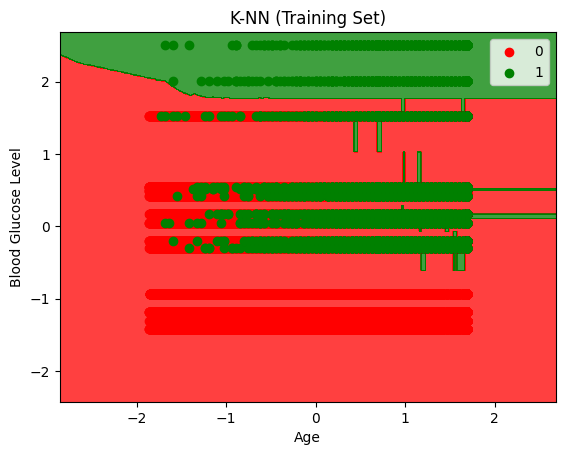

In [33]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
            color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training Set)')
plt.xlabel('Age')
plt.ylabel('Blood Glucose Level')
plt.legend()
plt.show()

###Visualising The Test Set Results

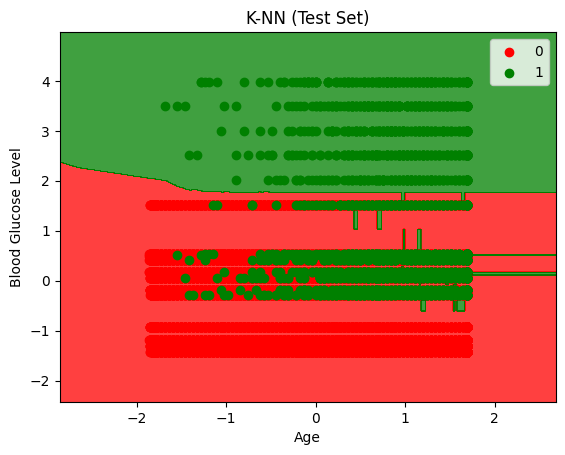

In [35]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
            color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test Set)')
plt.xlabel('Age')
plt.ylabel('Blood Glucose Level')
plt.legend()
plt.show()